<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [16]:
pwd

'/home/hyerin/userdata/pytorch-CycleGAN-and-pix2pix'

In [18]:
import os
os.chdir('/home/hyerin/userdata/pytorch-CycleGAN-and-pix2pix/')

In [4]:
!pip install -r requirements.txt

/home/hyerin/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |████████████████████████████████| 1.4 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 5.3 MB/s eta 0:00:011
     |████████████████████████████████| 2.0 MB 7.6 MB/s eta 0:00:01
  Created wheel for visdom: filename=visdom-0.2.3-py3-none-any.whl size=1417088 sha256=1ca6d342f3ab1941124dddd32bb8250d6b12b63c2b5ed6b2ba246e38ef9f4f74
  Stored in directory: /home/hyerin/.cache/pip/wheels/4d/73/32/0bbe55d2dccb9d80d3f020f474c15a5a1eef232817dcebe776
Successfully built visdom


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [19]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2022-11-13 21:01:04--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

  ./datasets/horse2   1%[                    ]   1.16M   540KB/s               ^C


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [115]:
!bash ./scripts/download_cyclegan_model.sh latest_net_G.pt

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [latest_net_G.pt]
for details.

--2022-11-13 22:53:53--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/latest_net_G.pt.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-13 22:53:53 ERROR 404: Not Found.



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [89]:
!python3 train.py --dataroot ./datasets/fish2note --name orange2apple --model cycle_gan --display_id -1

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/fish2note          	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
    

(epoch: 34, iters: 3, time: 0.114, data: 0.002) D_A: 0.112 G_A: 0.600 cycle_A: 2.363 idt_A: 0.059 D_B: 0.223 G_B: 0.478 cycle_B: 0.162 idt_B: 0.966 
End of epoch 34 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
saving the model at the end of epoch 35, iters 315
End of epoch 35 / 200 	 Time Taken: 2 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 36 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 37 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 38 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 39 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
saving the model at the end of epoch 40, iters 360
End of epoch 40 / 200 	 Time Taken: 2 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 41 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 42 / 200 	 Time Taken: 1 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 43 / 200 	 Time Taken: 1 

End of epoch 113 / 200 	 Time Taken: 1 sec
learning rate 0.0001723 -> 0.0001703
End of epoch 114 / 200 	 Time Taken: 1 sec
learning rate 0.0001703 -> 0.0001683
saving the model at the end of epoch 115, iters 1035
End of epoch 115 / 200 	 Time Taken: 2 sec
learning rate 0.0001683 -> 0.0001663
End of epoch 116 / 200 	 Time Taken: 1 sec
learning rate 0.0001663 -> 0.0001644
End of epoch 117 / 200 	 Time Taken: 1 sec
learning rate 0.0001644 -> 0.0001624
End of epoch 118 / 200 	 Time Taken: 1 sec
learning rate 0.0001624 -> 0.0001604
End of epoch 119 / 200 	 Time Taken: 1 sec
learning rate 0.0001604 -> 0.0001584
saving the model at the end of epoch 120, iters 1080
End of epoch 120 / 200 	 Time Taken: 2 sec
learning rate 0.0001584 -> 0.0001564
End of epoch 121 / 200 	 Time Taken: 1 sec
learning rate 0.0001564 -> 0.0001545
End of epoch 122 / 200 	 Time Taken: 1 sec
learning rate 0.0001545 -> 0.0001525
(epoch: 123, iters: 2, time: 0.115, data: 0.001) D_A: 0.046 G_A: 0.684 cycle_A: 1.478 idt_A: 0

End of epoch 192 / 200 	 Time Taken: 1 sec
learning rate 0.0000158 -> 0.0000139
End of epoch 193 / 200 	 Time Taken: 1 sec
learning rate 0.0000139 -> 0.0000119
End of epoch 194 / 200 	 Time Taken: 1 sec
learning rate 0.0000119 -> 0.0000099
saving the model at the end of epoch 195, iters 1755
End of epoch 195 / 200 	 Time Taken: 2 sec
learning rate 0.0000099 -> 0.0000079
End of epoch 196 / 200 	 Time Taken: 1 sec
learning rate 0.0000079 -> 0.0000059
End of epoch 197 / 200 	 Time Taken: 1 sec
learning rate 0.0000059 -> 0.0000040
End of epoch 198 / 200 	 Time Taken: 1 sec
learning rate 0.0000040 -> 0.0000020
End of epoch 199 / 200 	 Time Taken: 1 sec
learning rate 0.0000020 -> 0.0000000
(epoch: 200, iters: 9, time: 0.118, data: 0.000) D_A: 0.265 G_A: 0.180 cycle_A: 0.745 idt_A: 0.282 D_B: 0.080 G_B: 0.325 cycle_B: 0.578 idt_B: 0.246 
saving the model at the end of epoch 200, iters 1800
End of epoch 200 / 200 	 Time Taken: 2 sec


# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [90]:
!python3 test.py --dataroot datasets/fish2note/testA --name orange2apple_pretrained --model test --no_dropout

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/fish2note/testA      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                i

# Visualize

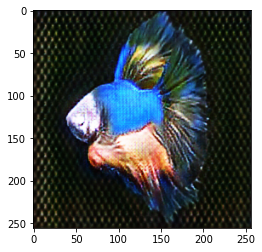

In [111]:
from pathlib import Path
import os
data_dir = Path('./results/orange2apple_pretrained/test_latest/images/')
data_dir = list(data_dir.rglob('*.png'))
plt.imshow(plt.imread('./'+ str(data_dir[0])))